In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (use .csv if you convert it)
df = pd.read_csv("../data/raw/train_delay.csv")

df.head()


,train_number,train_type,source,destination,distance_km,day_of_week,month,delay_minutes
0,12574,Shatabdi,MAS,NDLS,1086,Monday,7,45
1,12794,Superfast,NDLS,CNB,693,Thursday,3,8
2,12951,Superfast,PNBE,HWH,843,Sunday,8,37
3,12957,Vande Bharat,HWH,DDU,1283,Saturday,4,23
4,12452,Rajdhani,CSMT,SBC,1476,Saturday,10,18


In [4]:
df.shape

(500, 8)

The dataset contains 500 rows and 8 columns representing train routes, distance, seasonality, and delay.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   train_number   500 non-null    int64 
 1   train_type     500 non-null    object
 2   source         500 non-null    object
 3   destination    500 non-null    object
 4   distance_km    500 non-null    int64 
 5   day_of_week    500 non-null    object
 6   month          500 non-null    int64 
 7   delay_minutes  500 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 31.4+ KB


In [6]:
df.describe()

,train_number,distance_km,month,delay_minutes
count,500.000000,500.000000,500.000000,500.000000
mean,12507.390000,1009.218000,6.676000,30.544000
std,292.064543,455.982687,3.422053,16.387225
min,12001.000000,250.000000,1.000000,0.000000
25%,12230.000000,583.250000,4.000000,19.000000
50%,12508.000000,1055.500000,7.000000,29.000000
75%,12763.750000,1386.750000,10.000000,42.000000
max,12996.000000,1799.000000,12.000000,91.000000


## Column Description
- train_number: Unique identifier of train
- train_type: Category of train (Express, Rajdhani, etc.)
- source: Source station code
- destination: Destination station code
- distance_km: Distance between source and destination
- day_of_week: Day of journey
- month: Month of journey (1–12)
- delay_minutes: Arrival delay in minutes

In [7]:
df.isnull().sum()

train_number     0
train_type       0
source           0
destination      0
distance_km      0
day_of_week      0
month            0
delay_minutes    0
dtype: int64

No missing values were found in the dataset.

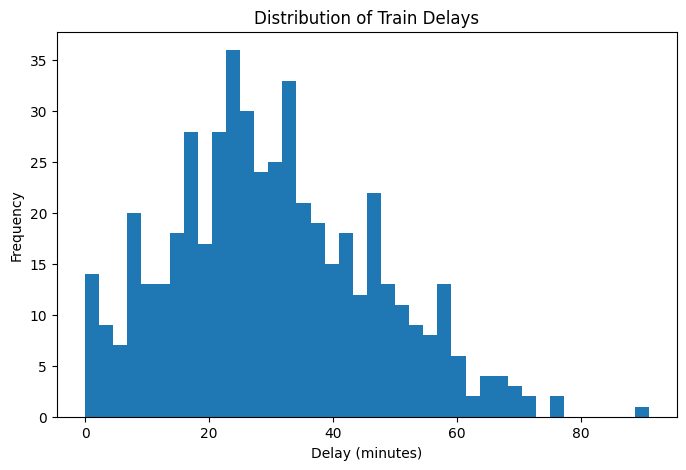

In [8]:
plt.figure(figsize=(8,5))
plt.hist(df['delay_minutes'], bins=40)
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Train Delays")
plt.show()

Most trains experience low to moderate delays, while fewer trains suffer extreme delays

plt.figure(figsize=(10,5))
sns.boxplot(x='train_type', y='delay_minutes', data=df)
plt.xticks(rotation=45)
plt.title("Delay Distribution by Train Type")
plt.show()

Premium trains show better punctuality compared to passenger trains

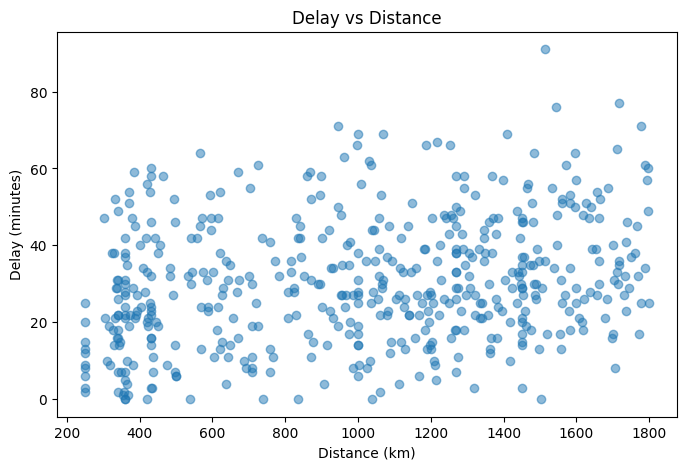

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(df['distance_km'], df['delay_minutes'], alpha=0.5)
plt.xlabel("Distance (km)")
plt.ylabel("Delay (minutes)")
plt.title("Delay vs Distance")
plt.show()

Delay tends to increase with distance, indicating cumulative operational impact on long routes

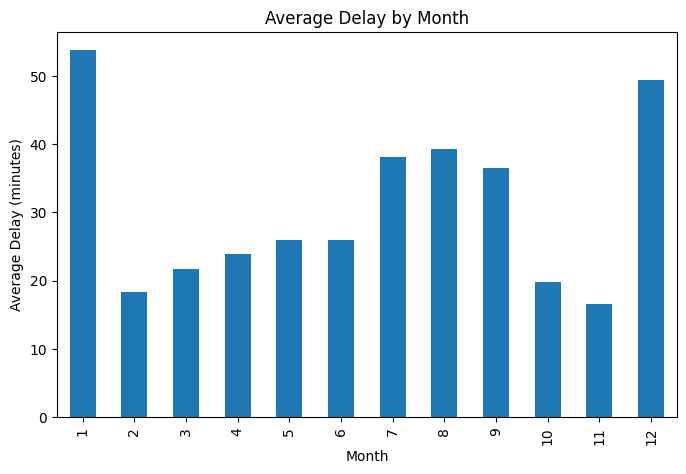

In [12]:
monthly_delay = df.groupby('month')['delay_minutes'].mean()

plt.figure(figsize=(8,5))
monthly_delay.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.title("Average Delay by Month")
plt.show()

Seasonal effects such as monsoon and winter fog significantly impact train punctuality

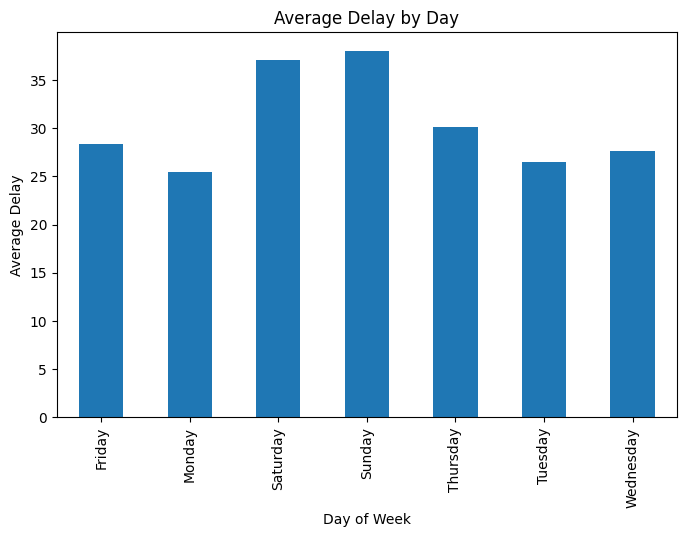

In [13]:
day_delay = df.groupby('day_of_week')['delay_minutes'].mean()

plt.figure(figsize=(8,5))
day_delay.plot(kind='bar')
plt.xlabel("Day of Week")
plt.ylabel("Average Delay")
plt.title("Average Delay by Day")
plt.show()

Weekends show relatively higher delays due to increased passenger traffic

In [15]:
top_routes = (
    df.groupby(['source', 'destination'])['delay_minutes']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_routes

source  destination
HWH     UMB            54.000000
NDLS    SBC            52.000000
CNB     MAS            47.000000
DDU     MAS            43.250000
HWH     MAS            42.125000
BZA     HWH            41.222222
CNB     NDLS           41.200000
UMB     MAS            40.250000
SBC     PNBE           39.500000
UMB     SBC            39.500000
Name: delay_minutes, dtype: float64

Certain routes consistently experience higher delays, indicating congestion or operational challenges

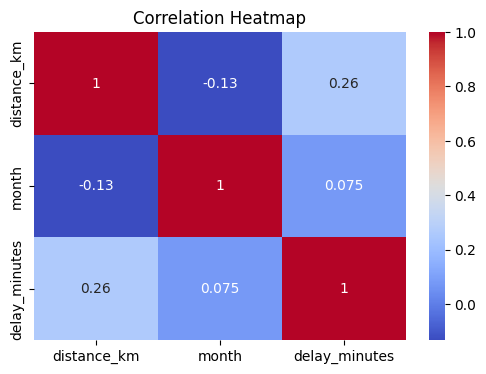

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['distance_km', 'month', 'delay_minutes']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()

Distance and seasonal factors show positive correlation with delay

## Key Insights from EDA
- Most trains experience moderate delays
- Mail/Express trains are more delay-prone than premium trains
- Longer routes tend to have higher delays
- Monsoon and winter months significantly increase delays
- Weekends show slightly higher delays